Dataset Shape: (100, 4)

First 5 rows:
   videos_watched  assignments_submitted  forum_posts completed
0              11                      6            5       yes
1              43                      1           11        no
2              37                      1            8        no
3              18                      4           14       yes
4               6                      4           15       yes

Model Evaluation Metrics:
Accuracy : 0.45
Precision: 0.6
Recall   : 0.462

Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.43      0.35         7
           1       0.60      0.46      0.52        13

    accuracy                           0.45        20
   macro avg       0.45      0.45      0.44        20
weighted avg       0.49      0.45      0.46        20



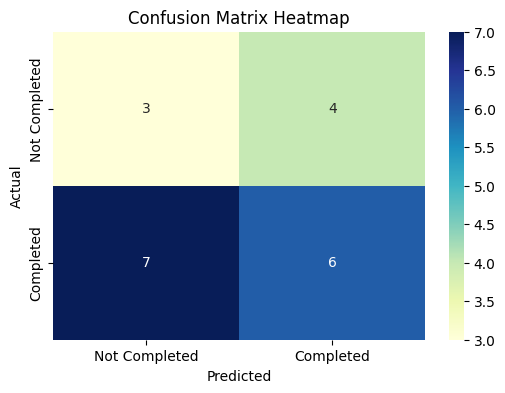

In [8]:
# ===============================
# Step 1: Import Required Libraries
# ===============================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# ===============================
# Step 2: Load the Dataset
# ===============================
file_path = '/content/online_learning.csv'  # Use the uploaded path
df = pd.read_csv(file_path)

# Display the shape and first few rows
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# ===============================
# Step 3: Preprocess the Dataset
# ===============================

# Convert 'yes'/'no' in 'completed' column to 1/0
df['completed'] = df['completed'].map({'yes': 1, 'no': 0})

# Drop any remaining missing values
df.dropna(inplace=True)

# Define features and target
X = df.drop('completed', axis=1)
y = df['completed']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===============================
# Step 4: Train-Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ===============================
# Step 5: Train the Model
# ===============================
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# ===============================
# Step 6: Evaluate the Model
# ===============================
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print("Accuracy :", round(accuracy, 3))
print("Precision:", round(precision, 3))
print("Recall   :", round(recall, 3))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ===============================
# Step 7: Confusion Matrix Heatmap
# ===============================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Not Completed', 'Completed'],
            yticklabels=['Not Completed', 'Completed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()
